<a href="https://colab.research.google.com/github/danadler-dev/APS-Physical-Review-Journals-Template/blob/main/ABC_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

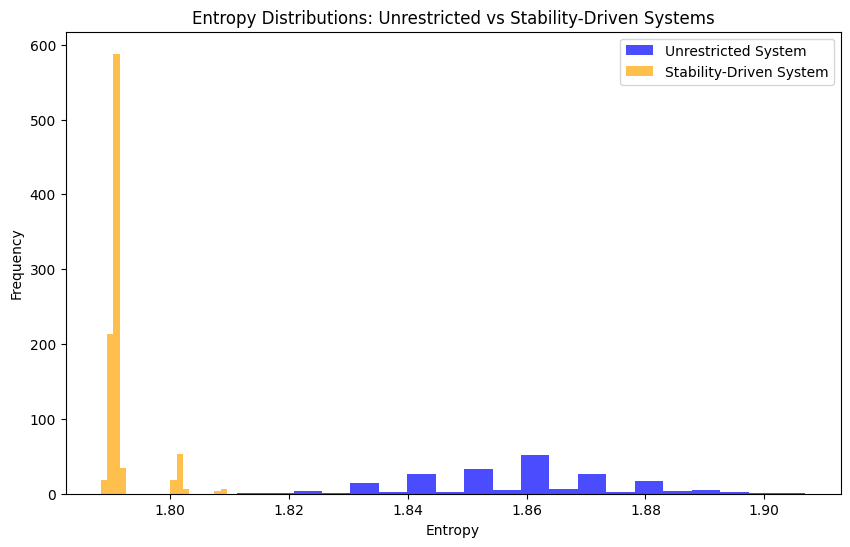

Mean of Entropy:
Unrestricted System: 1.8573689641840012
Stability-Driven System: 1.7919076796762605
Variance of Entropy:
Unrestricted System: 0.00029
Stability-Driven System: 0.00001


In [64]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Parameters for the simulation
n_runs = 300          # Number of Monte Carlo runs
n_generations = 50    # Number of generations per run
initial_base_count = 2  # Initial count of each base symbol
replenish_count = 2   # Number of base symbols replenished each generation
alphabet = ['A', 'B', 'C', 'D', 'E', 'F']  # Base symbols

# Define the unrestricted system simulation
def simulate_unrestricted_system(n_generations, initial_base_count, replenish_count, alphabet):
    state = Counter({s: initial_base_count for s in alphabet})
    all_distributions = []
    for _ in range(n_generations):
        # Interact: Randomly combine two symbols
        pairs = [(a, b) for a in state for b in state if a != b or state[a] > 1]
        if pairs:
            chosen_pair = pairs[np.random.choice(len(pairs))]
            new_symbol = ''.join(sorted(chosen_pair))
            state[new_symbol] += 1
            state[chosen_pair[0]] -= 1
            state[chosen_pair[1]] -= 1
            state += Counter()  # Remove zero counts
        # Replenish base symbols
        state.update({s: replenish_count for s in alphabet})
        # Save distribution
        all_distributions.append(dict(state))
    return all_distributions

# Define the stability-driven system simulation
def simulate_stability_driven_system(n_generations, initial_base_count, replenish_count, alphabet):
    state = Counter({s: initial_base_count for s in alphabet})
    stable_compounds = {'AA', 'BBB', 'CCCC', 'BBDD', 'ACEE'}  # Define stable compounds
    all_distributions = []
    for _ in range(n_generations):
        # Interact: Randomly combine two symbols, but only keep stable compounds
        pairs = [(a, b) for a in state for b in state if a != b or state[a] > 1]
        if pairs:
            chosen_pair = pairs[np.random.choice(len(pairs))]
            new_symbol = ''.join(sorted(chosen_pair))
            if new_symbol in stable_compounds:
                state[new_symbol] += 1
            state[chosen_pair[0]] -= 1
            state[chosen_pair[1]] -= 1
            state += Counter()  # Remove zero counts
        # Replenish base symbols
        state.update({s: replenish_count for s in alphabet})
        # Save distribution
        all_distributions.append(dict(state))
    return all_distributions

# Simulate both systems
unrestricted_results = [
    simulate_unrestricted_system(n_generations, initial_base_count, replenish_count, alphabet)
    for _ in range(n_runs)
]
stability_results = [
    simulate_stability_driven_system(n_generations, initial_base_count, replenish_count, alphabet)
    for _ in range(n_runs)
]

# Compute entropy for a given distribution
def compute_entropy(distribution):
    total = sum(distribution.values())
    probs = [v / total for v in distribution.values()]
    return -sum(p * np.log(p) for p in probs if p > 0)

# Calculate entropy for the final generation across runs
unrestricted_entropies = [compute_entropy(run[-1]) for run in unrestricted_results]
stability_entropies = [compute_entropy(run[-1]) for run in stability_results]

# Plot the entropy distributions
plt.figure(figsize=(10, 6))
plt.hist(
    unrestricted_entropies, bins=20, alpha=0.7, label="Unrestricted System", color="blue", density=True
)
plt.hist(
    stability_entropies, bins=20, alpha=0.7, label="Stability-Driven System", color="orange", density=True
)
plt.xlabel("Entropy")
plt.ylabel("Frequency")
plt.title("Entropy Distributions: Unrestricted vs Stability-Driven Systems")
plt.legend()
plt.show()

# Compute mean of entropy for each system
unrestricted_mean = np.mean(unrestricted_entropies)
stability_mean = np.mean(stability_entropies)

print("Mean of Entropy:")
print(f"Unrestricted System: {unrestricted_mean}")
print(f"Stability-Driven System: {stability_mean}")

# Compute variance of entropy for each system
unrestricted_variance = np.var(unrestricted_entropies)
stability_variance = np.var(stability_entropies)


print("Variance of Entropy:")
print(f"Unrestricted System: {unrestricted_variance:.5f}")
print(f"Stability-Driven System: {stability_variance:.5f}")


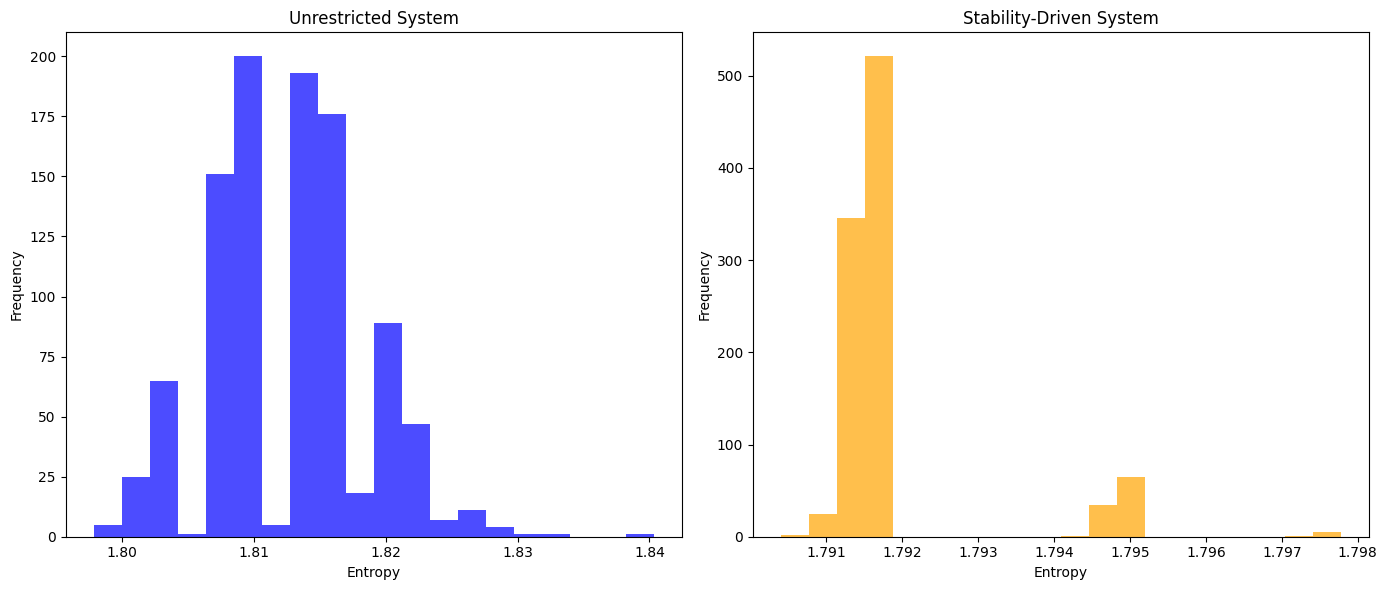

Mean of Entropy:
Unrestricted System: 1.812867526895303
Stability-Driven System: 1.7918882284341962
Variance of Entropy:
Unrestricted System: 3.2688118928632393
Stability-Driven System: 0.12510335585238977


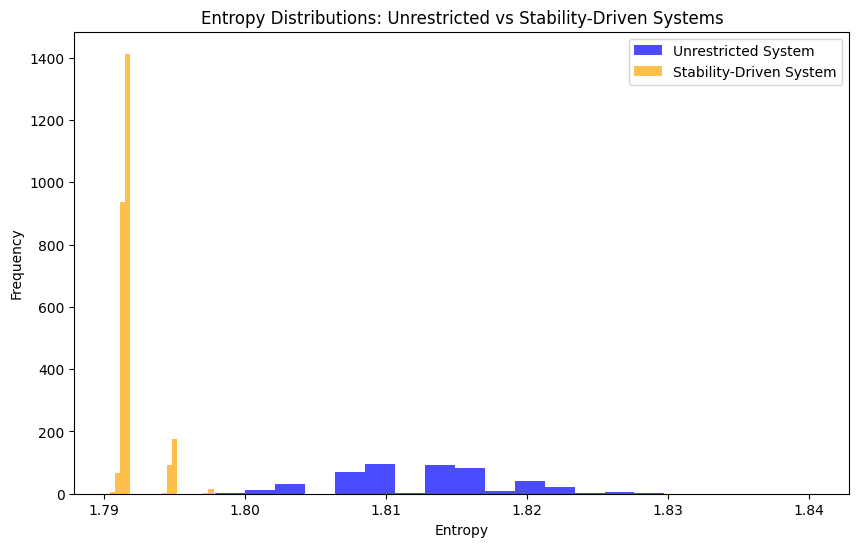

In [61]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Parameters for the simulation
n_runs = 1000          # Number of Monte Carlo runs
n_generations = 200    # Number of generations per run
initial_base_count = 2  # Initial count of each base symbol
replenish_count = 2   # Number of base symbols replenished each generation
alphabet = ['A', 'B', 'C', 'D', 'E', 'F']  # Base symbols

# Define the unrestricted system simulation
def simulate_unrestricted_system(n_generations, initial_base_count, replenish_count, alphabet):
    state = Counter({s: initial_base_count for s in alphabet})
    all_distributions = []
    for _ in range(n_generations):
        # Interact: Randomly combine two symbols
        pairs = [(a, b) for a in state for b in state if a != b or state[a] > 1]
        if pairs:
            chosen_pair = pairs[np.random.choice(len(pairs))]
            new_symbol = ''.join(sorted(chosen_pair))
            state[new_symbol] += 1
            state[chosen_pair[0]] -= 1
            state[chosen_pair[1]] -= 1
            state += Counter()  # Remove zero counts
        # Replenish base symbols
        state.update({s: replenish_count for s in alphabet})
        # Save distribution
        all_distributions.append(dict(state))
    return all_distributions

# Define the stability-driven system simulation
def simulate_stability_driven_system(n_generations, initial_base_count, replenish_count, alphabet):
    state = Counter({s: initial_base_count for s in alphabet})
    stable_compounds = {'AA', 'BBB', 'CCCC', 'BBDD', 'ACE', 'FFFFF'}  # Define stable compounds
    all_distributions = []
    for _ in range(n_generations):
        # Interact: Randomly combine two symbols, but only keep stable compounds
        pairs = [(a, b) for a in state for b in state if a != b or state[a] > 1]
        if pairs:
            chosen_pair = pairs[np.random.choice(len(pairs))]
            new_symbol = ''.join(sorted(chosen_pair))
            if new_symbol in stable_compounds:
                state[new_symbol] += 1
            state[chosen_pair[0]] -= 1
            state[chosen_pair[1]] -= 1
            state += Counter()  # Remove zero counts
        # Replenish base symbols
        state.update({s: replenish_count for s in alphabet})
        # Save distribution
        all_distributions.append(dict(state))
    return all_distributions

# Simulate both systems
unrestricted_results = [
    simulate_unrestricted_system(n_generations, initial_base_count, replenish_count, alphabet)
    for _ in range(n_runs)
]
stability_results = [
    simulate_stability_driven_system(n_generations, initial_base_count, replenish_count, alphabet)
    for _ in range(n_runs)
]

# Compute entropy for a given distribution
def compute_entropy(distribution):
    total = sum(distribution.values())
    probs = [v / total for v in distribution.values()]
    return -sum(p * np.log(p) for p in probs if p > 0)

# Calculate entropy for the final generation across runs
unrestricted_entropies = [compute_entropy(run[-1]) for run in unrestricted_results]
stability_entropies = [compute_entropy(run[-1]) for run in stability_results]

# Plot side-by-side distributions with independent Y scales
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Unrestricted System
axes[0].hist(
    unrestricted_entropies, bins=20, alpha=0.7, color="blue", density=False
)
axes[0].set_title("Unrestricted System")
axes[0].set_xlabel("Entropy")
axes[0].set_ylabel("Frequency")

# Stability-Driven System
axes[1].hist(
    stability_entropies, bins=20, alpha=0.7, color="orange", density=False
)
axes[1].set_title("Stability-Driven System")
axes[1].set_xlabel("Entropy")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Compute mean of entropy for each system
unrestricted_mean = np.mean(unrestricted_entropies)
stability_mean = np.mean(stability_entropies)

print("Mean of Entropy:")
print(f"Unrestricted System: {unrestricted_mean}")
print(f"Stability-Driven System: {stability_mean}")

# Compute variance of entropy for each system
unrestricted_variance = np.var(unrestricted_entropies)
stability_variance = np.var(stability_entropies)


print("Variance of Entropy:")
print(f"Unrestricted System: {1e5*unrestricted_variance}")
print(f"Stability-Driven System: {1e5*stability_variance}")

# Plot the entropy distributions
plt.figure(figsize=(10, 6))
plt.hist(
    unrestricted_entropies, bins=20, alpha=0.7, label="Unrestricted System", color="blue", density=True
)
plt.hist(
    stability_entropies, bins=20, alpha=0.7, label="Stability-Driven System", color="orange", density=True
)
plt.xlabel("Entropy")
plt.ylabel("Frequency")
plt.title("Entropy Distributions: Unrestricted vs Stability-Driven Systems")
plt.legend()
plt.show()

Skewness and Kurtosis:
Unrestricted System - Skewness: 0.218, Kurtosis: 0.285 (Skewness near zero, indicating symmetry. Moderate kurtosis, reflecting the bell-shaped distribution)
Stability-Driven System - Skewness: 2.712, Kurtosis: 6.488 (Positive skewness, indicating right-skewed distribution. Higher kurtosis due to heavy tails from dominant stable compounds)


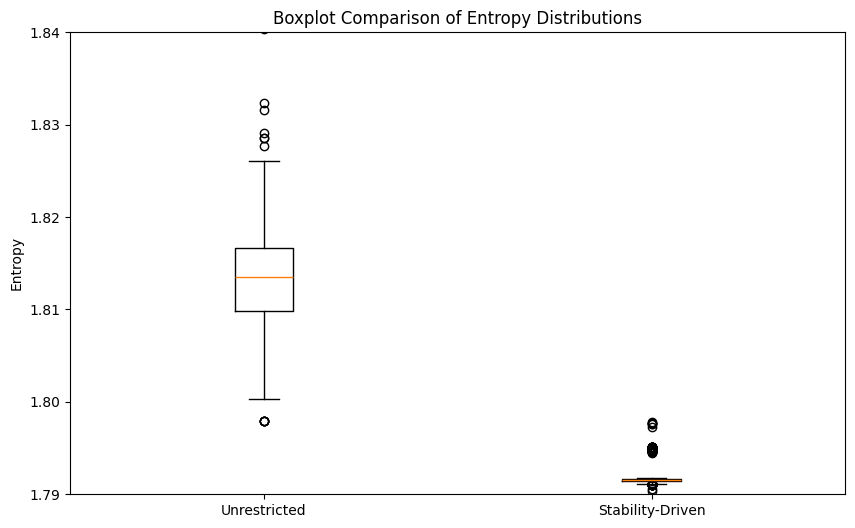

In [62]:
from scipy.stats import skew, kurtosis

# Compute skewness and kurtosis for each distribution
unrestricted_skewness = skew(unrestricted_entropies)
stability_skewness = skew(stability_entropies)

unrestricted_kurtosis = kurtosis(unrestricted_entropies, fisher=True)
stability_kurtosis = kurtosis(stability_entropies, fisher=True)

# Print skewness and kurtosis
print("Skewness and Kurtosis:")
print(f"Unrestricted System - Skewness: {unrestricted_skewness:.3f}, Kurtosis: {unrestricted_kurtosis:.3f}" + " (Skewness near zero, indicating symmetry. Moderate kurtosis, reflecting the bell-shaped distribution)")

print(f"Stability-Driven System - Skewness: {stability_skewness:.3f}, Kurtosis: {stability_kurtosis:.3f}" + " (Positive skewness, indicating right-skewed distribution. Higher kurtosis due to heavy tails from dominant stable compounds)")

# Visualize boxplots for comparison
plt.figure(figsize=(10, 6))
plt.boxplot([unrestricted_entropies, stability_entropies], labels=["Unrestricted", "Stability-Driven"])
plt.ylim(1.79, 1.84)
plt.title("Boxplot Comparison of Entropy Distributions")
plt.ylabel("Entropy")
plt.show()


<ipython-input-72-5f84f1e4b827>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0].plot(


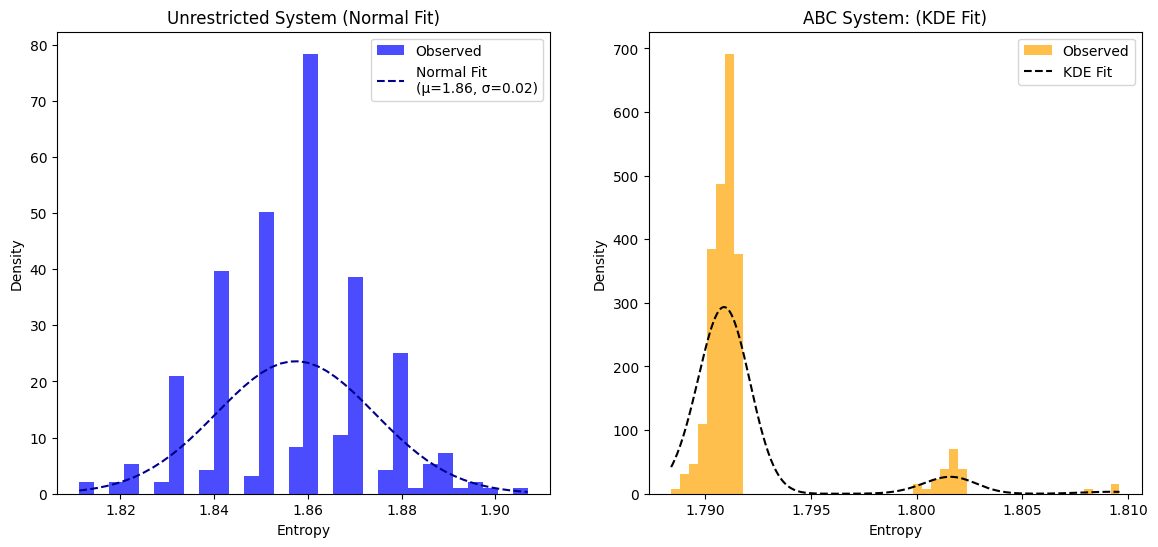

In [72]:
# Import libraries
from scipy.stats import norm, gamma
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Fit distributions
# Normal for unrestricted
unrestricted_mu, unrestricted_sigma = norm.fit(unrestricted_entropies)

# Create plots

fig, axes = plt.subplots(1, 2, figsize=(14, 6))


# Plot for unrestricted system
axes[0].hist(unrestricted_entropies, bins=30, alpha=0.7, color="blue", density=True, label="Observed")
x_unrestricted = np.linspace(min(unrestricted_entropies), max(unrestricted_entropies), 50)
axes[0].plot(
    x_unrestricted,
    norm.pdf(x_unrestricted, unrestricted_mu, unrestricted_sigma),
    'k--',
    label=f"Normal Fit\n(μ={unrestricted_mu:.2f}, σ={unrestricted_sigma:.2f})",
    color="darkblue"
)
axes[0].set_title("Unrestricted System (Normal Fit)")
axes[0].set_xlabel("Entropy")
axes[0].set_ylabel("Density")
axes[0].legend()

kde = gaussian_kde(stability_entropies)
x_kde = np.linspace(min(stability_entropies), max(stability_entropies), 500)
axes[1].hist(stability_entropies, bins=50, alpha=0.7, color="orange", density=True, label="Observed")
axes[1].plot(x_kde, kde(x_kde), 'k--', label="KDE Fit")
axes[1].set_title("ABC System: (KDE Fit)")
axes[1].set_xlabel("Entropy")
axes[1].set_ylabel("Density")
axes[1].legend()
plt.show()